## Importations et chargement

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
csv_path = 'data/CES19.csv'


In [5]:
df = pd.read_csv(csv_path, index_col=0)
df.head()

df_columns = df.columns

C:\Users\plebe\AppData\Local\Temp\ipykernel_19308\426359106.py:1: DtypeWarning: Columns (25,27,28,30,31,33,34,39,179,181,188,192,193,199,210,227,234,236,237,239,240,243,276,299,302,311,314,315,316,327,362,417,418,421,422,423,424,425,431,464,465,468,538,541,578,579,582,583,584) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path, index_col=0)


In [3]:
def get_column_names():
    """
    Returns a list of column names
    """
    return df.columns.tolist()

def get_column_value_counts(column_name):
    """
    Returns a df with the value counts of a column
    """
    return df[column_name].value_counts()

def plot_column_values(column_name):
    """
    Plots a column values
    """
    df[column_name].value_counts().plot(kind='bar')
    plt.title(f"Distribution des réponses de la question {column_name}")
    plt.show()

def get_unique_values_per_column(min_unique_threshold=None, max_unique_threshold=None):
    """
    Returns a list of unique values per column with optional minimum threshold
    """
    unique_values = df.nunique()

    if min_unique_threshold:
        unique_values = unique_values[unique_values > min_unique_threshold]
    elif max_unique_threshold:
        unique_values = unique_values[unique_values < max_unique_threshold]

    return unique_values

def get_columns_per_value_keyword(keyword):
    """
    Returns a list of columns with a value containing the keyword
    """
    return df.columns[df.apply(lambda x: keyword in x.values, axis=0)].tolist()

def get_samples_per_column(N=5):
    """
    Returns a sample of non-NaN answers per column if they exist
    """
    samples_per_column = {}
    for column in df.columns:
        non_nan_values = df[column][~df[column].isna()]

        if len(non_nan_values) > N:
            samples_per_column[column] = non_nan_values.sample(N).tolist()

    return samples_per_column
    

In [4]:
samples_per_column = get_samples_per_column()

samples_per_column

{'cps19_StartDate': ['2019-10-11 13:00:45',
  '2019-09-24 07:19:50',
  '2019-09-23 08:02:32',
  '2019-09-29 13:57:13',
  '2019-09-19 02:36:27'],
 'cps19_EndDate': ['2019-10-11 06:27:50',
  '2019-10-18 07:48:36',
  '2019-10-11 07:15:36',
  '2019-09-30 08:35:59',
  '2019-09-29 07:15:33'],
 'cps19_ResponseId': ['R_2EmCxdKQxCEvqLP',
  'R_2zA696OMBtcnanU',
  'R_bOtxV9NJ6Da3eiB',
  'R_6VkeoZhIg44q51v',
  'R_ykXM7XFt5XTihsl'],
 'cps19_consent': ['I consent to participate in this study. I have read all of the information about the study.',
  'I consent to participate in this study. I have read all of the information about the study.',
  'I consent to participate in this study. I have read all of the information about the study.',
  'I consent to participate in this study. I have read all of the information about the study.',
  'I consent to participate in this study. I have read all of the information about the study.'],
 'cps19_citizenship': ['Canadian citizen',
  'Canadian citizen',
  'Canad

### Enlever les colonnes ayant plus de 125 réponses uniques

In [5]:
unique_answers_max = 125
columns_with_too_many_unique_answers = get_unique_values_per_column(min_unique_threshold=unique_answers_max)

print(f"\nIl y a {len(columns_with_too_many_unique_answers)} colonnes avec trop de réponses uniques.\n")

# Create another df without those columns
df2 = df.loc[:, [column not in columns_with_too_many_unique_answers for column in df.columns]]


Il y a 47 colonnes avec trop de réponses uniques.



### Enlever les colonnes ayant 0 ou 1 réponse unique

In [6]:
unique_answers_min = 2
columns_without_enough_unique_answers = get_unique_values_per_column(max_unique_threshold=unique_answers_min)

print(f"\nIl y a {len(columns_without_enough_unique_answers)} colonnes avec trop peu de réponses uniques.\n")

# Create another df without those columns
df3 = df2.loc[:, [column not in columns_without_enough_unique_answers for column in df2.columns]]


Il y a 137 colonnes avec trop peu de réponses uniques.



### Enlever les questions jugées non-pertinentes

In [7]:
non_pertinent_columns = [
    "cps19_consent", # La question de consentement à répondre avant de commencer le questionnaire
    
]

print(f"\nIl y a {len(non_pertinent_columns)} colonnes non pertinentes.\n")

df4 = df3.loc[:, [column not in non_pertinent_columns for column in df3.columns]]

df4


Il y a 1 colonnes non pertinentes.



,cps19_citizenship,cps19_yob,cps19_gender,cps19_province,cps19_education,cps19_demsat,cps19_imp_iss_party,cps19_imp_loc_iss_p,cps19_interest_gen_1,cps19_interest_elxn_1,...,split_health_followups,split_gender_id,split_big5,split_hatespeech,split_vol_assoc,pes19_data_quality,pes19_panel,pes19_age,pes19_duplicates_flag,pes19_inattentive
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1,Canadian citizen,1989,A woman,Quebec,Master's degree,Fairly satisfied,Green Party,ndp,9.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Canadian citizen,1998,A woman,Quebec,Master's degree,Don't know/ Prefer not to answer,Green Party,ndp,6.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Canadian citizen,2000,A woman,Ontario,Some university,Fairly satisfied,NaN,NaN,8.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Canadian citizen,1998,A man,Ontario,Some university,Fairly satisfied,Conservative Party,NaN,8.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Canadian citizen,2000,A woman,Ontario,Completed secondary/ high school,Fairly satisfied,Don't know/ Prefer not to answer,Conservative Party,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37818,Canadian citizen,1961,A man,Quebec,Bachelor's degree,Fairly satisfied,Liberal Party,NaN,7.0,7.0,...,0.0,0.0,0.0,1.0,0.0,0.0,pes19_r,58.0,0.0,0.0
37819,Canadian citizen,1991,A man,Ontario,Bachelor's degree,Not very satisfied,Green Party,NaN,8.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37820,Canadian citizen,1969,A woman,Saskatchewan,"Some technical, community college, CEGEP, Coll...",Fairly satisfied,ndp,ndp,10.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Trouver les questions à choix multiples non étalées sur plusieurs questions

In [147]:
multiple_choice_question_keywords = ["Very satisfied", "None of these", "Got better", "Fewer immigrants", "Fewer refugees", "Not at all well", "Very opposed", "Fairly strongly", "Some of the time", "Much closer", "A good job", "None at all", "Very comfortable", "Extremely easy", "Weekly", "Sometimes", "Just once", "Much more"]
#print(get_columns_per_value_keyword("Very satisfied"))

# Questions à 7 choix
six_choice_questions = ['pes10_socnet3']
print(f"Il y a {len(six_choice_questions)} questions à 7 choix.")

# Questions à 6 choix
six_choice_questions = ['pes19_keepromises', 'pes19_tieus', 'pes19_tiechina', 'pes19_emb_info', 'pes19_donerm', 'pes19_donew', 'pes19_donegl', 'pes19_doneqc', 'pes19_taxes_1', 'pes19_taxes_2', 'pes19_taxes_3', 'pes19_taxes_4', 'pes19_taxes_5', 'pes19_gap']
print(f"Il y a {len(six_choice_questions)} questions à 6 choix.")

# Questions à 5 choix
five_choice_questions = ['cps19_demsat', 'cps19_fed_gov_sat', 'cps19_prov_gov_sat', 'pes19_dem_sat', 'pes19_emb_satif', "cps19_rel_imp", 'cps19_pos_fptp', 'cps19_pos_life', 'cps19_pos_cannabis', 'cps19_pos_carbon', 'cps19_pos_energy', 'cps19_pos_envreg', 'cps19_pos_jobs', 'cps19_pos_subsid', 'cps19_pos_trade', 'cps19_govt_confusing', 'cps19_govt_say', 'cps19_pol_eth', 'cps19_lib_promises', 'pes19_pos_fptp', 'pes19_paymed', 'pes19_senate', 'pes19_envirojob', 'pes19_hatespeech', 'pes19_losetouch', 'pes19_womenhome', 'pes19_govtcare', 'pes19_complicated', 'pes19_famvalues', 'pes19_pollie', 'pes19_bilingualism', 'pes19_equalrights', 'pes19_ethid', 'pes19_fitin', 'pes19_immigjobs', 'pes19_govteff', 'pes19_govtprograms', 'pes19_emb_none', 'pes19_emb_id', 'pes19_emb_vote16', 'pes19_lowturnout', 'pes19_internetvote1', 'pes19_mediaelite', 'pes19_medianolie', 'pes19_opinion', 'pes19_lookslikeme', 'pes19_womenparl', 'pes19_populism_1', 'pes19_populism_2', 'pes19_populism_3', 'pes19_populism_4', 'pes19_populism_5', 'pes19_populism_6', 'pes19_populism_7', 'pes19_populism_8', 'pes19_nativism1', 'pes19_nativism2', 'pes19_nativism3', 'pes19_nativism4', 'pes19_nativism5', 'pes19_canid1', 'pes19_canid2', 'pes19_canid3', 'pes19_sdo1', 'pes19_sdo2', 'pes19_sdo3', 'pes19_sdo4', 'pes19_abort3', 'pes19_abort6', 'pes19_trade', 'pes19_privjobs', 'pes19_govt_act_ineq', 'pes19_deserve1', 'pes19_deserve2', 'pes19_blame', 'pes19_hostile1', 'pes19_hostile2', 'pes19_hostile3', 'pes19_benevolent1', 'pes19_benevolent2', 'pes19_benevolent3', 'pes19_pos_carbon', 'pes19_pos_energy', 'pes19_newerlife', 'pes19_happy', 'pes19_satisfied', 'pes19_cognition', 'cps19_snclav', 'cps19_quebec_sov', 'pes19_ottawa_perf', 'pes19_conf_inst1_1', 'pes19_conf_inst1_2', 'pes19_conf_inst1_3', 'pes19_conf_inst2_1', 'pes19_conf_inst2_2', 'pes19_conf_inst2_3', 'pes19_conf_inst2_4', 'pes19_conf_inst2_5', 'pes19_conf_inst2_6', 'pes19_conf_inst2_7', 'pes19_conf_inst2_8', 'pes19_conf_inst2_9' 'pes19_internetregis', 'pes19_disagreed', 'pes19_affective_1', 'pes19_affective_2', 'pes19_affective_3', 'pes19_affective_4' 'cps19_volunteer', 'pes19_partic1_1', 'pes19_partic1_2', 'pes19_partic1_3', 'pes19_partic2_1', 'pes19_partic2_2', 'pes19_partic2_3', 'pes19_partic2_4', 'pes19_partic3_1', 'pes19_partic3_2', 'pes19_partic3_3', 'pes19_partic3_4', 'pes19_partic3_5', 'pes19_partic3_6']
print(f"Il y a {len(five_choice_questions)} questions à 5 choix.")

# Questions à 3 choix + Extra (Je ne sais pas/préfère ne pas répondre)
four_choice_questions = ['cps19_spend_educ', 'cps19_spend_env', 'cps19_spend_just_law', 'cps19_spend_defence', 'cps19_spend_imm_min' 'cps19_econ_retro', 'cps19_own_fin_retro', 'cps19_imm', 'cps19_refugees', 'cps19_fed_id_str', 'cps19_prov_id_str', 'pes19_pidtradstrong']
print(f"Il y a {len(four_choice_questions)} questions à 3 choix.")


Il y a 1 questions à 7 choix.
Il y a 14 questions à 6 choix.
Il y a 120 questions à 5 choix.
Il y a 11 questions à 3 choix.


Liberal Party                       612
Conservative Party                  536
ndp                                 330
Don't know/ Prefer not to answer    257
Bloc Qu<e9>b<e9>cois                176
Green Party                         130
People's Party                       38
Another party (please specify)       14
Name: cps19_v_advance, dtype: int64


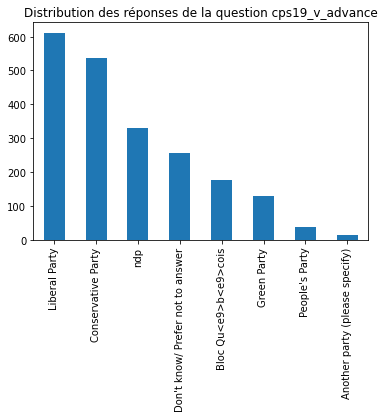

In [145]:
col_of_interest = "cps19_v_advance"
print(df[col_of_interest].value_counts())
plot_column_values(col_of_interest)

### Isoler les questions "étiquette"

In [140]:
label_questions = ['cps19_votechoice', 'cps19_votechoice_pr', 'cps19_vote_unlikely', 'cps19_vote_unlike_pr', 'cps19_v_advance']
label_detail_questions = ['cps19_votechoice_7_TEXT', 'cps19_votechoice_pr_7_TEXT', 'cps19_vote_unlikely_7_TEXT', 'cps19_vote_unlike_pr_7_TEXT', 'cps19_v_advance_7_TEXT', 'cps19_vote_lean', 'cps19_vote_lean_7_TEXT', 'cps19_vote_lean_pr', 'cps19_vote_lean_pr_7_TEXT', 'cps19_2nd_choice', 'cps19_2nd_choice_7_TEXT', 'cps19_2nd_choice_pr', 'cps19_2nd_choice_pr_7_TEXT', 'cps19_not_vote_for_1', 'cps19_not_vote_for_2', 'cps19_not_vote_for_3', 'cps19_not_vote_for_4', 'cps19_not_vote_for_5', 'cps19_not_vote_for_6', 'cps19_not_vote_for_7', 'cps19_not_vote_for_8', 'cps19_not_vote_for_9', 'cps19_not_vote_for_7_TEXT']

### Liste metadata pertinente/non-pertinente

In [15]:
meta_data_pertinente = ["cps19_current_date",
                        "cps19_Q_Language",         #lanque de reponse du repondant
                        "cps19_data_quality",       # certaines indication sur qualité data
                        "cps19_age",
                        "cps19_duplicates_flag",
                        "cps19_inattentive",        # peut donner un hint sur qualité des données 1 si innatentif
                        "pes19_current_date",
                        "pes19_Q_Language",
                        "pes19_age",
                        "pes19_duplicates_flag",
                        "pes19_inattentive",

                        ]



meta_data_non_pertinente = ["cps19_StartDate",
                            "cps19_EndDate",
                            "cps19_ResponseId",
                            "cps19_current_date_string",    #dupliqué de cps19_current_date
                            "cps19_Q_TotalDuration",
                            "get_news",                 # 1 si repondant fait poser la question cps19_news_cons
                            "get_more_naming",          # c'est fait poser cps19_govgen_name et cps19_presrus_name
                            "get_not_vote_for",
                            "get_party_issue_handling",
                            "get_imp_loc_iss",
                            "get_outcome",
                            "justice_law",
                            "justice_law_fr",           # différence mineure dans le wording de la question
                            "lr_scale_order",
                            "ethnicity_intro",          # différence mineure de question en fonction de citizenship
                            "ethnicity_intro_fr",
                            "premier",
                            "province_fr",
                            "pid_en",
                            "pid_party_en",
                            "cps19_data_quality",
                            "cps19_panel",              # "Which panel the respondent was drawn from"
                            "constituencynumber",       # numero de circonscription ne semble pas surper pertinent
                            "constituencyname",
                            "cps19_fsa",
                            "cps19_weight_general_all", #poids associé au répondant
                            "cps19_weight_general_restricted",
                            "pes19_StartDate",
                            "pes19_EndDate",
                            "pes19_ResponseId",
                            "pes19_current_date_string",
                            "pes19_Q_TotalDuration",
                            "pes19_fsa",
                            "notvote_split",
                            "splitsample",
                            "confidence_institutions_word",
                            "confidence_institutions_word_fr",
                            "govt_programs_word",
                            "govt_programs_word_fr",
                            "split_taxes",
                            "split_senate",
                            "split_trade",
                            "split_lifesat",
                            "split_responsibility",
                            "split_sexism",
                            "split_abortion",
                            "split_getahead",
                            "split_att_div",
                            "split_govt_eff",
                            "split_medical",
                            "split_ties",
                            "split_health_followups",
                            "split_gender_id",
                            "split_big5",
                            "split_hatespeech",
                            "split_vol_assoc",
                            "PES19_data_quality",
                            "pes19_panel",
                            "pes19_weight_general_all",
                            "pes19_weight_general_restricted",
                            
                            ]


### Querstions pertinentes/non-pertientes

In [11]:
questions_pertinentes = [
    "cps19_citizenship",
    "cps19_gender",         # string "A man" "A woman" "Other (e.g. Trans, non-binary, two-spirit, gender-queer)"
    "cps19_province",
    "cps19_education",
    "cps19_demsat",
    "cps19_imp_iss_party",  # personnes qui n'ont pas répondue à cps19_imp_iss n'ont pas la question
    "cps19_imp_loc_iss_p",
    "cps19_votechoice",
    "cps19_votechoice_pr",  # pas vraiment certain de celle là. S'addresse aux pr qui ne peuvent pas voter
    "cps19_vote_unlikely",  # idem
    "cps19_vote_unlike_pr", #idem(p-etre regrouper avec cps19_votechoice_pr cps19_vote_unlikely cps19_votechoice
    "cps19_v_advance",      # vote par anticipation (s'ils ont déjà voté, pour qui ils ont voté)
    "cps19_vote_lean",      # regrouper avec cps19_vote_unlike_pr et autre
    "cps19_vote_lean_pr",   # regrouper avec cps19_vote_unlike_pr et autre
    "cps19_2nd_choice",     #
    'cps19_2nd_choice_pr',  # merge avec cps19_2nd_choice
    "cps19_not_vote_for",   # (_1 - _9)
    "cps19_fed_gov_sat",    # deg de satisfaction du gouv libéral
    "cps19_party_rating",   # Sliders (merge _23 - _28)?
    "cps19_lead_rating",    # Sliders (merge _23 - _28)?
    "cps19_cand_rating_23", # Sliders (merge _23 - _28)? par certain, spécifique au candidat dans la circonscription
    "cps19_lead_int",       # _113-_120, merge possible
    "cps19_lead_strong",    # _113-_120, merge possible
    "cps19_lead_trust",     # _113-_120, merge possible
    "cps19_lead_cares",     # _113-_120, merge possible
    "cps19_spend_educ",     # opinion priorité, renseigne sur alligmeent poilitique éducation
    "cps19_spend_env",      # opinion priorité, renseigne sur alligmeent poilitique environement
    "cps19_spend_just_law", # opinion priorité, renseigne sur alligmeent poilitique systeme de justice
    "cps19_spend_defence",  # opinion priorité, renseigne sur alligmeent poilitique armée
    "cps19_spend_imm_min",  # opinion priorité, renseigne sur alligmeent poilitique immigration
    "cps19_pos_cannabis",   # opinion priorité, renseigne sur alligmeent poilitique criminalisation de la posession de cannabis
    "cps19_pos_carbon",     # merge possible avec cps19_spend_env
    "cps19_pos_energy",     # opinion, alligmeent poilitique secteur energie petrole (merge possible cps19_spend_env)
    "cps19_pos_envreg",     # opinion, alignement politique sur regulation environnement. (merge possible cps19_spend_env)
    "cps19_pos_jobs",       # opinion, alignement politique sur prio environnement vs jobs. (merge possible cps19_spend_env)
    "cps19_pos_subsid",     # opinion, alignement politique sur aide financière aux entreprises.
    "cps19_econ_retro",     # opinion, economie canadienne s'est améliorée ou pas
    "cps19_econ_fed",       # merge possible avec cps19_econ_retro
    "cps19_ownfinanc_fed",  # merge possible avec cps19_econ_retro
    "cps19_issue_handle",   # multiple dimensions question difficile à analyser (need merge)
    "cps19_imm",            # maybe merge avec cps19_spend_imm_min
    "cps19_refugees",       # maybe merge avec cps19_spend_imm_min
    "cps19_lib_promises",   #indicateur de satsifaction avec statut quo
    "cps19_quebec_sov",     # souveraineté du quebec
    "cps19_own_fin_retro",  # relative finance perso, possible merge avec cps19_econ_retro (maybe)
    "cps19_fed_id",         # question directe d'affiliation politique
    "cps19_fed_id_str",     # niveau de confiance dans l'affiliation politique federale
    "cps19_prov_id",        # affiliation politique provinciale
    "cps19_prov_id_str",    # niveau de confiance dans l'affiliation politique provinciale
    "cps19_groups_therm",   # _1-_5 niveau d'appréciation des groupe marginaux
    "cps19_vote_2015",      # quel parti le repondant a voté en 2015
    "cps19_religion",       # religion du repondant. (pas certain pour la pertinence) _1-_23 + text answer.
    "cps19_rel_imp",        # importance de la religion. (maybe merge avec cps19_religion)
    "cps19_bornin_canada",  # peut etre pas super pertinent avec cps19_citizenship. faut examiner les réponses.
    "cps19_bornin_other",   # pays de naissance si "cps19_bornin_canada = non"
    "cps19_employment",     # type d'emploi
    "cps19_sector",         # secteur d'emploi
    "cps19_union",          # fait partie d'un syndicat
    "cps19_children",       # avez vous des enfants.
    "cps19_income_number",  # revenu du repondant
    "cps19_income_cat",     # revenu de la famille du repondant
    "cps19_property",       # avez vous un propriété
    "cps19_marital",        # statut marital
    "cps19_household",      # nombre d'occupant dans l'habitation

]

questions_non_pertinentes = [
    "cps19_consent",
    "cps19_yob",                # Dupliqué de cps19_age
    "cps19_yob_2001_age",
    "cps19_imp_iss",        # enjeux le plus important (text based answers)... cps19_imp_iss_party plus relevant
    "cps19_imp_loc_iss",        # enjeux local, les réponses vont surement trop varier. (plein de nans aussi)
    "cps19_interest_gen",       # peut être un bon indicateur de l'intention de voter, mais on s'en fou un peu
    "cps19_interest_elxn",      # idem
    "cps19_v_likely",           # idem
    "cps19_v_likely_pr",        # idem
    "cps19_lr_scale_bef_1", # slider pour gauche vs droite. 0=left, 5 = droite, 10 = je sais pas (mode reponse semble ambigu)
    "cps19_lr_parties",         # slider gauche vs droite party. 0=left, 5 = droite, 10 = je sais pas (mode reponse semble ambigu)
    "cps19_lr_scale_aft",       # cps19_lr_scale_bef_1 mais la question est posé arpès cps19_lr_parties (check de cohérence)
    "cps19_pos_fptp",           # mode de scrutin
    "cps19_pos_life",           # aide médical à mourrir
    "cps19_pos_trade",          # opinion, alignement politique sur libre marché (pas certain qu'on peu discriminé avec ça)
    "cps19_most_seats",         # pas certain que l'estimé du nombre de députés est relevent
    "cps19_win_local",          # même chose
    "cps19_outcome_most",       # outcome espéré risque d'être vraiment bruité. (text based answer en plus)
    "cps19_outcome_least",      # même chose (text based answer en plus)
    "cps19_govt_confusing",     # parle du niveau de compréhension du systeme politique. pas tant relevant
    "cps19_govt_say",           # parle du niveau d'impuissance vis à vis le systeme politique. pas tant relevant
    "cps19_pol_eth",            # opinion: est-ce que les politiciens agissent éthiquement. pas tant relevant
    "cps19_snclav",             # trop spécific
    "cps19_news_cons",          # evalue le niveau de politisation du repondant
    "cps19_volunteer",          # niveau d'implication sociale
    "cps19_duty_choice",        # vote = devoir ou choix
    "cps19_presrus_name",       # data_filter
    "get_news",                 # data filter
    "get_outcome",              # data filter
    "get_party_issue_handling", # data filter
    "cps19_premier_name",       # test de politisation (nom du 1er ministre prov.)
    "cps19_finmin_name",        # test de politisation (nom du ministre des finances)
    "cps19_govgen_name",        # test de politisation (nom du gouv. générale du canada)
    "cps19_presrus_name",       # test de politisation (nom du president russe)
    "cps19_prov_gov_sat",       # niveau de statisfaction premier ministre gouv
    "cps19_party_member",       # demande si membre d'un parti. ne va pas donner d'info sur beaucoup de monde
    "cps19_fed_member",         # demande quel de quel parti fed le repondant est membre.
    "cps19_prov_member",        # demande quel de quel parti prov le repondant est membre.
    "cps19_fed_donate",         # donnateur d'un parti fed après 2015
    "cps19_spoil",              # si le repondant a deja annulé son vote.
    "cps19_turnout_2015",       # si le repondant a voté en 2015
    "cps19_debate_en",          # si le repondant a regardé le débat englais
    "cps19_debate_fr",          # si le repondant a regarde le debat francais
    "cps19_imm_year",           # année d'immigration (commence a etre pas mal pointu comme question)
    "cps19_ethnicity",          # ethnicité
    "cps19_sexuality",          # orrientation sexuelle
    "cps19_language",           # langue maternelle

]
df["confidence_institutions_word"]
# list(df.columns)

Unnamed: 0
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
          ...   
37818    worried
37819        NaN
37820        NaN
37821        NaN
37822        NaN
Name: confidence_institutions_word, Length: 37822, dtype: object